# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Загрузка и ознакомление с данными

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', 50)
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


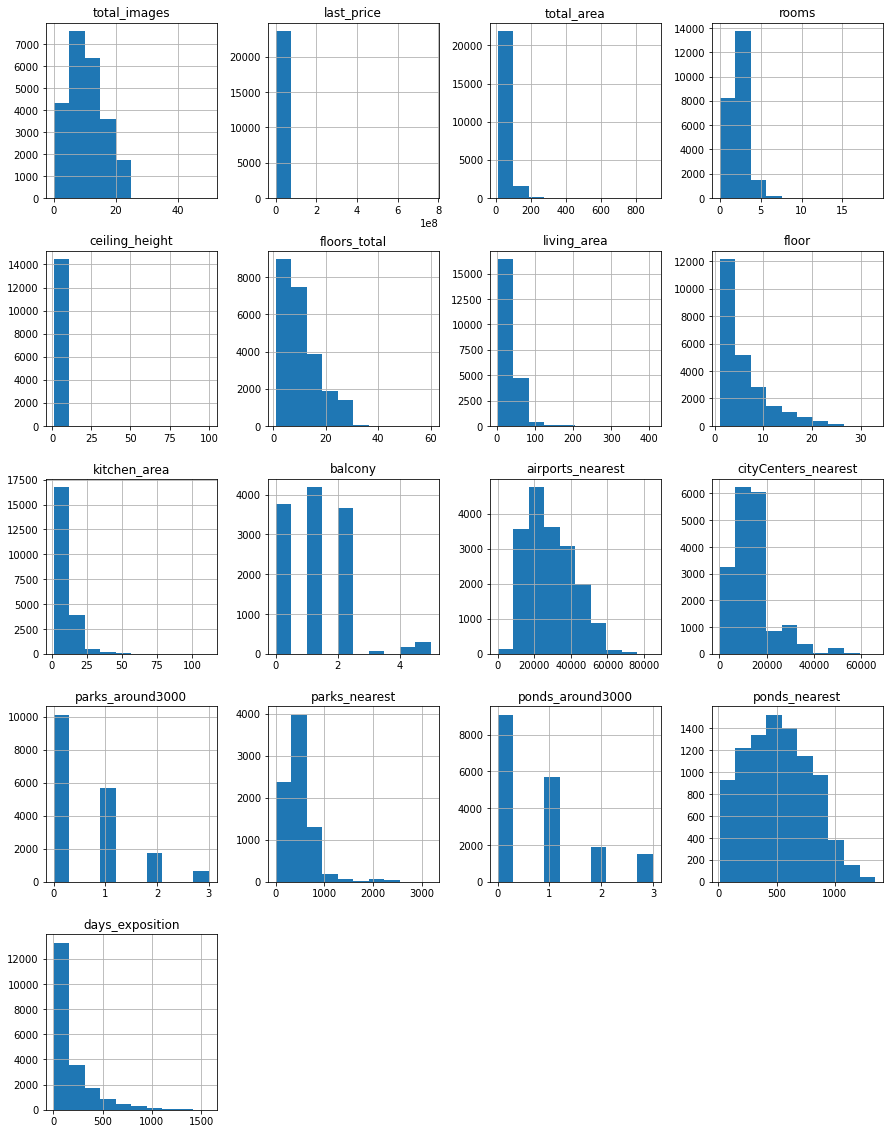

In [6]:
data.hist(figsize=(15, 20))
None

In [8]:
data.isna().sum()/len(data)*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Из результатов видно, что пропуски имеются в столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 
При этом в столбцах ponds_nearest, parks_nearest, is_apartment пропуски составляют более 50%. С ними нам придстоит разобраться, по возмоности.

## Работа с пропусками

In [9]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Можно предположить, что пропуски в столбце 'is_apartment' обусловены тем, что пользоватли пропускали данный столбец, т.к. их тип недвижимости не является апартаментом. Поэтому заменим пропуски значением False

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Заполним пропуски в столбце 'balcony' на значения 0, т.к. вероятнее всего, пользователи просто пропускали этот столбец из-за отсутствия балкона.

In [11]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

Попробуем заполнить пропуски 'living_area', исходя из похожих по количеству комнат объектов.

In [12]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
data['living_area'].isna().sum()

0

Пропуски в locality_name и floors_total составялют малую долю от всех данных, поэтому их можно отбросить.

In [13]:
data = data.dropna(subset = ['locality_name', 'floors_total'])

Логичную замену в оставшисхся столбцах предложить невозможно, поэтому на данном этапе оставим эти значения как есть. Посмотрим на оставшееся количество пропусков:

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

## Изменение типа данных

Заменим типы данных в floors_total, last_price и floor на int64 - т.к. это всегда целые числа.

In [15]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['last_price'] = data['last_price'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  int64  
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  int64  
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Столбец first_day_exposition логично заменить на тип daytime, т.к. возможно, он нам понадобится для дальнейших вычислений.

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

## Работа с дубликатами

Проверим "locality_name" на наличие явных дубликатов

In [17]:
data.duplicated().sum()

0

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
len(data['locality_name'].unique())

364

Заменим все буквы "ё" на "е", а также избавимся от названий населенных пунктов, т.к. имеются названия "поселок городского типа Советский" и "городской посёлок Советский"

In [20]:
data['locality_name'] = data['locality_name'].apply(lambda title: ' '.join(word for word in title.split(' ') if not(word.islower())))

In [21]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [22]:
len(data['locality_name'].unique())

305

## Поиск и изучение анамальных значений

In [23]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

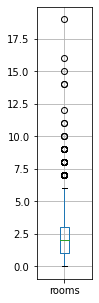

In [24]:
data.boxplot(column='rooms', figsize=(1, 5))

По диаграмме можно заметить, что значения больше 11 крайне редкие, оставим только позиции со значением rooms<12

In [26]:
(len(data.query('rooms > 12'))/len(data))*100

0.02121790791427965

In [25]:
clear_data = data.query('rooms < 12').reset_index(drop=True)

Взглянем на столбец total_area

In [27]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

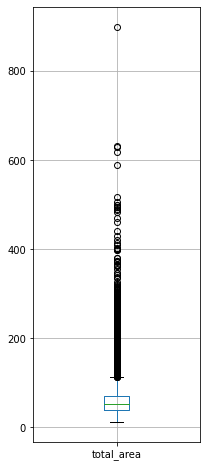

In [28]:
data.boxplot(column='total_area', figsize=(3, 8))

Очевидно, что квартиры площадью более 400 метров - редкое исключение, их также можно исключить. Перезапишем данные в очищенный датафрейм.

In [29]:
clear_data = data.query('0 < total_area < 400').reset_index(drop=True)

Теперь обратим внимание на столбец ceiling_height

(0.0, 40.0)

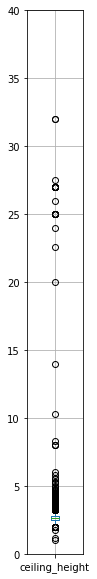

In [30]:
data.boxplot(column='ceiling_height', figsize=(1, 10))
plt.ylim([0, 40])

Из диаграммы видно, что значения выше 20 метров встречаются, можно предположить, что данные были введены не корректно, и вместо 2.4 записали 24, к примеру. Исправим это

In [31]:
def ceil_height(height):
    if 20 <= height <= 40:
        return height / 10
    return height

In [32]:
clear_data = clear_data.query('ceiling_height < 40').reset_index(drop=True)
clear_data['ceiling_height'] = clear_data['ceiling_height'].apply(ceil_height).reset_index(drop=True)

<AxesSubplot:>

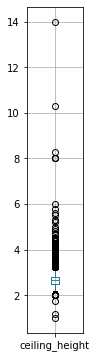

In [33]:
clear_data.boxplot(column='ceiling_height', figsize=(1, 6))

Значения высоты полотка менее 2 м и более 6 м являются редкими, и их можно отбросить. Сформируем новый набор данных, исключив эти значения:

In [34]:
clear_data['ceiling_height'] = clear_data.query('2 <= ceiling_height < 6').reset_index(drop=True)

Теперь мы можем заполнить оставшиеся пропуски медианным значением ceiling_height

In [35]:
clear_data['ceiling_height'] = clear_data['ceiling_height'].fillna(clear_data['ceiling_height'].median())
clear_data['ceiling_height'].isna().sum()

0

Рассмотрим столбец living_area

<AxesSubplot:>

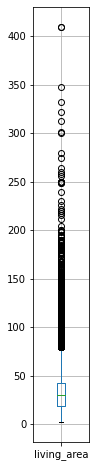

In [36]:
data.boxplot(column='living_area', figsize=(1, 8))

По графику видно, что значения после 200 являюься редкими, их можно отбросить, внесем эту корректировку в наш датафрейм

In [37]:
clear_data = clear_data.query('0 < living_area < 200').reset_index(drop=True)
clear_data['living_area'].isna().sum()

0

Посмотрим на оставшиеся пустые значение living_area

In [38]:
len(clear_data)

14453

In [39]:
clear_data[clear_data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Можно исключить эти значения, т.к. строки где total_area < 10 - либо ошибочны, либо не являются жилыми помещениями. Оставшиеся строки имеют слишком большое количество пропусков в столбцах, больше 50%, маловероятно, что эти данные будут нам полезны для расчетов.

In [40]:
clear_data = clear_data.dropna(subset = ['living_area'])

In [41]:
len(clear_data)

14453

Взглянем на столбцы floors_total и floor

<AxesSubplot:>

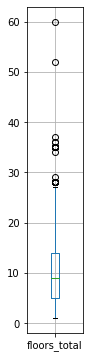

In [42]:
clear_data.boxplot(column='floors_total', figsize=(1, 6))

Значение выше 30 посчитаем за выброс и избавимся от них

In [43]:
clear_data = clear_data.query('floors_total < 40').reset_index(drop=True)

In [44]:
len(clear_data)

14451

<AxesSubplot:>

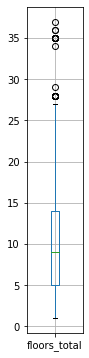

In [45]:
clear_data.boxplot(column='floors_total', figsize=(1, 6))

<AxesSubplot:>

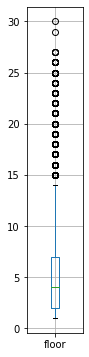

In [46]:
clear_data.boxplot(column='floor', figsize=(1, 6))

По графику заметно, что значения выше 25 являются редкими, можно их отбросить

In [47]:
clear_data = clear_data.query('floor <= 25').reset_index(drop=True)
len(clear_data)

14434

Разберемся с последним столбцом - kitchen_area

<AxesSubplot:>

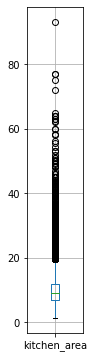

In [48]:
clear_data.boxplot(column='kitchen_area', figsize=(1, 6))

Значения выше 75 являются редкими - избавимся от них, поскольку они не дают четкого предствляения общей ситуации.

In [49]:
clear_data = clear_data.query('kitchen_area <= 70').reset_index(drop=True)
len(clear_data)

13499

<AxesSubplot:>

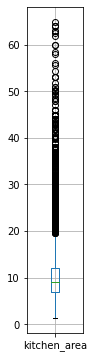

In [50]:
clear_data.boxplot(column='kitchen_area', figsize=(1, 6))

В результате визуализации данных по столбцам rooms, total_area, ceiling_height, living_area, floors_total, floor и kitchen_area мы определили выбросы в данных и избавились от редких, выбивающихся значений. Благодаря этому, наши дальнейшие расчеты будут более приближены к реальной и более актуальной обстановке на рынке недвижимости. 

## Расчет и добавление в таблицу новых столбцов

Определим цену одного квадратного метра

In [51]:
clear_data['price_per_meter'] = round((clear_data['last_price']/clear_data['total_area']), 2)
clear_data['price_per_meter']

0        120370.37
1        100000.00
2         88524.59
3        127525.25
4         82943.93
           ...    
13494    129903.98
13495     73717.95
13496     72490.85
13497    149511.40
13498     41795.67
Name: price_per_meter, Length: 13499, dtype: float64

Определим день публикации объявления

In [52]:
clear_data['publication_weekday'] = clear_data['first_day_exposition'].dt.weekday
clear_data['publication_weekday']

0        3
1        1
2        6
3        3
4        5
        ..
13494    3
13495    4
13496    1
13497    1
13498    4
Name: publication_weekday, Length: 13499, dtype: int64

Определим месяц публикации объявления

In [53]:
clear_data['publication_month'] = clear_data['first_day_exposition'].dt.month
clear_data['publication_month']

0         3
1         6
2         2
3        11
4         7
         ..
13494    10
13495     8
13496     3
13497     3
13498     7
Name: publication_month, Length: 13499, dtype: int64

Определим месяц в конкретном году, для удобства понимания временного периода

In [54]:
clear_data['exposition_month_of_the_year'] = clear_data.first_day_exposition.astype('datetime64[M]')
clear_data['exposition_month_of_the_year'].head()

0   2019-03-01
1   2018-06-01
2   2017-02-01
3   2017-11-01
4   2017-07-01
Name: exposition_month_of_the_year, dtype: datetime64[ns]

In [55]:
clear_data['publication_year'] = clear_data['first_day_exposition'].dt.year
clear_data['publication_year']

0        2019
1        2018
2        2017
3        2017
4        2017
         ... 
13494    2016
13495    2016
13496    2017
13497    2017
13498    2017
Name: publication_year, Length: 13499, dtype: int64

Разобъем колонку floor на группы, для удобства восприятия и анализа информации.

In [56]:
def floor_definition(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
clear_data['floor_type'] = clear_data.apply(floor_definition, axis=1)
clear_data['floor_type']

0           другой
1           другой
2           другой
3           другой
4        последний
           ...    
13494       другой
13495       другой
13496       другой
13497       другой
13498       первый
Name: floor_type, Length: 13499, dtype: object

Определение расстрояния до центра города

In [57]:
clear_data['cityCenters_nearest_km'] = round(clear_data['cityCenters_nearest']/1000)
clear_data['cityCenters_nearest_km']

0        16.0
1         8.0
2        15.0
3        14.0
4        33.0
         ... 
13494     4.0
13495    34.0
13496     4.0
13497    10.0
13498     NaN
Name: cityCenters_nearest_km, Length: 13499, dtype: float64

## Проведение исследовательского анализа данных

Общая площадь

<AxesSubplot:>

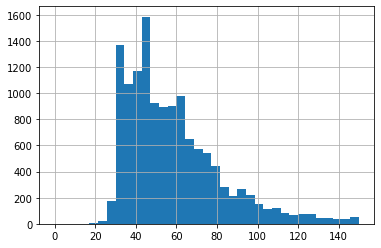

In [58]:
clear_data['total_area'].hist(bins=35, range=(0,150))

В данных преобладают квартиры площадью 45 квадратных метров, так же, достаточно много квартир площадью от 35-40 кв.м, должно быть все это однокомнатные квартиры.

Жилая площадь

<AxesSubplot:>

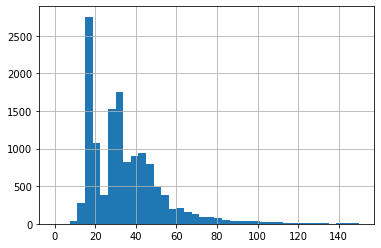

In [59]:
clear_data['living_area'].hist(bins=40, range=(0,150))

Преобладают лоты с жилой площадью в 18-19 кв.м, за ними следуют позиции с жилой площадью в 35 кв.м

Площадь кухни

<AxesSubplot:>

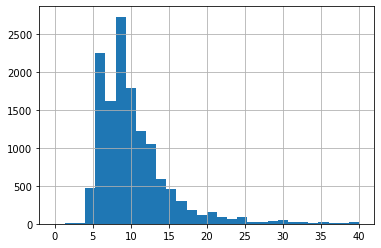

In [60]:
clear_data['kitchen_area'].hist(bins=30, range=(0,40))

На рынке преобладают объекты с площадью кухни 6-12 кв.м, чаще площадью кухни составляет 8-9 кв.м

Цена объекта

<AxesSubplot:>

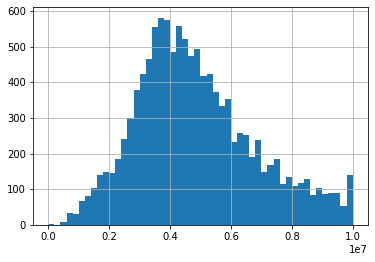

In [61]:
clear_data['last_price'].hist(bins=50, range=(0,10000000))

Распределение цены очень похоже на нормальное, наиболее часто встречающаяся цена находится в диапазоне 3,5 - 5 млн.руб.

Количетство комнат

<AxesSubplot:>

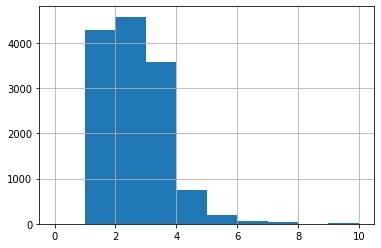

In [62]:
clear_data['rooms'].hist(bins=10, range=(0, 10))

Преобладают однокомнатные и двухкомнатные квартиры, замыкают тройку лидеров - четырехкомнатные квартиры. Объекты недвижимости с 5 комнатами и более - редкость.

Высота потолков

<AxesSubplot:>

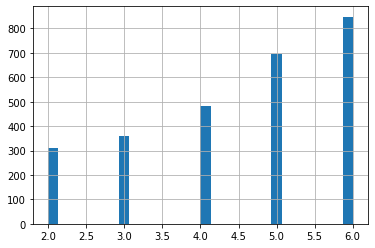

In [63]:
clear_data['ceiling_height'].hist(bins=30, range=(2, 6))

В основном, высота потолков около 2.5-2.6, что в целом вполне объективно. Потолки в квартирах старого фонда редко превышают 2.5 метра, а потолки в новостроках эконом класса - чуть повыше. 

Этаж квартиры

<AxesSubplot:>

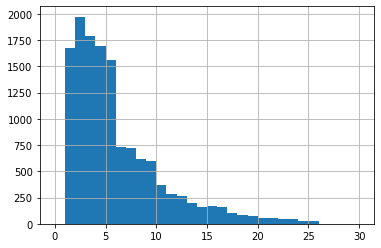

In [64]:
clear_data['floor'].hist(bins=30, range=(0, 30))

В основном, в продаже находятся квартиры до 6 этажа.

Тип этажа

<AxesSubplot:>

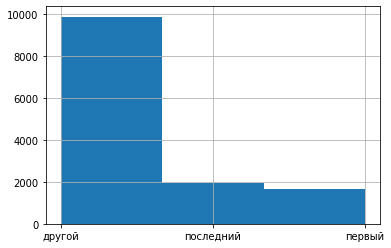

In [65]:
clear_data['floor_type'].hist(bins=3)

Пожавляющее большинство продаваемых квартир находятся не на первых и не на последних этажах.

Общее количество этажей в доме

<AxesSubplot:>

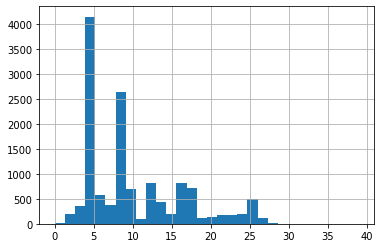

In [66]:
clear_data['floors_total'].hist(bins=30, range=(0, 39))

Наибольшее количество квартир продаются в 5 и 9 этажных домах.

Расстояние до центра города в метрах

<AxesSubplot:>

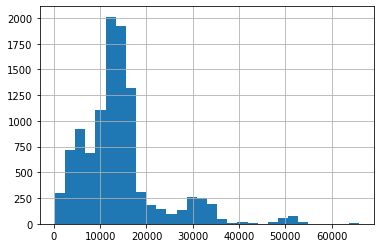

In [67]:
clear_data['cityCenters_nearest'].hist(bins=30)

Больше всего продаются квартиры отдаленные от центра на 12-16км.

Расстояние до блиайшего аэропорта в метрах

<AxesSubplot:>

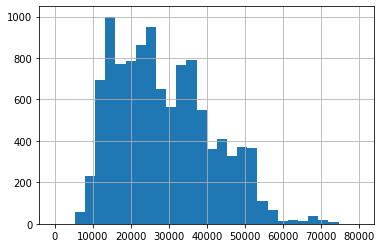

In [68]:
clear_data['airports_nearest'].hist(bins=30, range=(0, 80000))

Данные удаленности от аэропорта сильно разбросаны, однако в объявлениях преобладают квартиры на 14-26км удаленные от блжайшего аэропорта.

Расстояние до ближайшего парка

<AxesSubplot:>

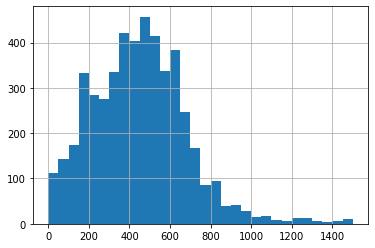

In [69]:
clear_data['parks_nearest'].hist(bins=30, range=(0, 1500))

Самые популярные квартиры в продаже имеют парк в радиусе 350-550 метров

Данные по дню публикации

<AxesSubplot:>

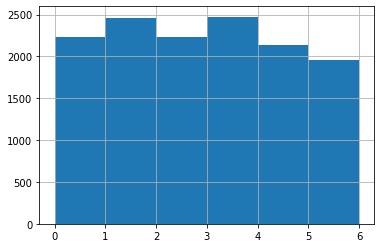

In [70]:
clear_data['publication_weekday'].hist(bins=6)

Публикация объявлений о продаже распределена по дням недели равномерно, с небольшим преобладанием во вторник и четверг.

Месяц публикации

<AxesSubplot:>

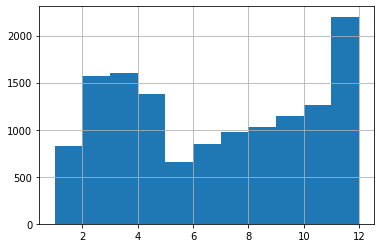

In [71]:
clear_data['publication_month'].hist(bins=11)

Можно заметить, что активно публикуют информацию о продажах квартир под конец года

Скорость продажи квартир

<AxesSubplot:>

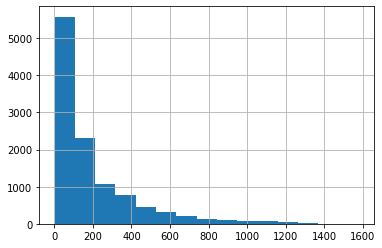

In [72]:
clear_data['days_exposition'].hist(bins=15)

In [73]:
clear_data['days_exposition'].describe()

count    11175.000000
mean       192.885369
std        229.713170
min          1.000000
25%         45.000000
50%        107.000000
75%        251.000000
max       1580.000000
Name: days_exposition, dtype: float64

Попробуем поменять масштаб, что бы шире взглянуть на данные

<AxesSubplot:>

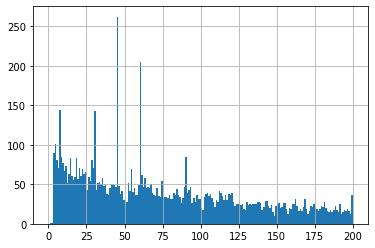

In [74]:
clear_data['days_exposition'].hist(bins=200, range=(0, 200))

In [75]:
clear_data['days_exposition'].value_counts().head(15)

45.0    262
60.0    205
7.0     144
30.0    143
4.0     101
3.0      89
8.0      85
90.0     84
18.0     83
14.0     83
28.0     81
5.0      81
9.0      77
11.0     73
29.0     71
Name: days_exposition, dtype: int64

Интересно, что чаще всего квартиры продают за 45 и 60 дней после публикации. Медиана по продаже квартир 107 дней, среднее значение отличается - 192 дня, из-за наличия длительных продаж более чем в 4 года.

## Изучение факторов, влияющих на общую (полную) стоимость объекта.

### Корреляция общей стоимости и общей площади

In [76]:
clear_data.pivot_table(index='last_price', values='total_area', aggfunc='median').sort_values(by='last_price', ascending=False).head(15)

,total_area
last_price,
330000000,190.0
289238400,187.5
245000000,285.7
159984000,242.4
155000000,310.0
135000000,166.0
130000000,231.0
124350000,248.7
124000000,124.5


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

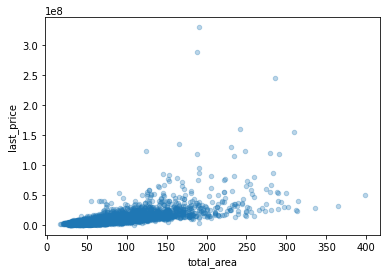

In [77]:
clear_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

In [78]:
round(clear_data['total_area'].corr(clear_data['last_price']), 2)

0.66

Из графика видна прямая зависимость увеличения общей площади с ростом цены, так же квартиры примерно от 125 кв.м. наблюдается разброс цен и на квартиры с одинаковой площадью

### Корреляция общей стоимости и жилой площади

In [79]:
clear_data.pivot_table(index='last_price', values='living_area', aggfunc='median').sort_values(by='last_price', ascending=False).head(15)

,living_area
last_price,
330000000,95.0
289238400,63.7
245000000,182.8
159984000,131.0
155000000,190.0
135000000,52.0
130000000,148.0
124350000,131.0
124000000,67.2


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

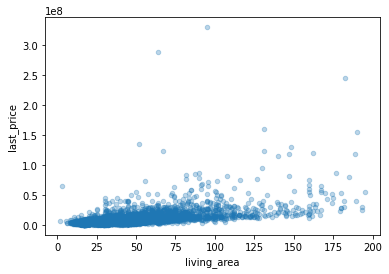

In [80]:
clear_data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

In [81]:
round(clear_data['living_area'].corr(clear_data['last_price']), 2)

0.58

Также наблюдется линейная зависимость увеличения стоимости в связи с увеличением жилой площади, что волне логично и закономерно.

### Корреляция общей стоимости и площади кухни

In [82]:
clear_data.pivot_table(index='last_price', values='kitchen_area', aggfunc='median').sort_values(by='last_price', ascending=False).head(10)

,kitchen_area
last_price,
330000000,40.0
289238400,30.2
245000000,29.8
159984000,20.0
155000000,63.0
135000000,64.0
130000000,12.0
124350000,23.0
124000000,20.0


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

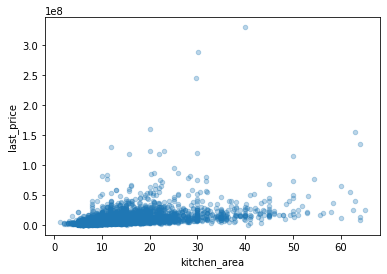

In [83]:
clear_data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

In [84]:
round(clear_data['kitchen_area'].corr(clear_data['last_price']), 2)

0.5

График в целом похож на предыдущие 2, ситуация похожая, с увеличением площади кухни увеличивается и цена. Однако, пока коэффицент корреляции ниже чем у общей площади и жилой площади. 

### Корреляция общей стоимости и количества комнат

In [85]:
clear_data.pivot_table(index='last_price', values='rooms', aggfunc='median').sort_values(by='last_price', ascending=False).head(10)

,rooms
last_price,
330000000,3.0
289238400,2.0
245000000,6.0
159984000,4.0
155000000,5.0
135000000,3.0
130000000,6.0
124350000,4.0
124000000,4.0


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

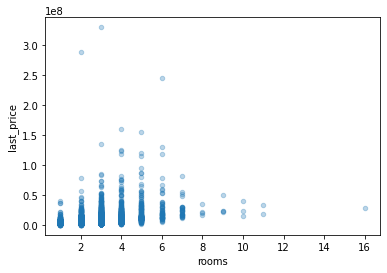

In [86]:
clear_data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)

In [87]:
round(clear_data['rooms'].corr(clear_data['last_price']), 2)

0.4

Также наблюдается увеличение цены с увеличением количества комнат, однако коэффицент корреляции стал еще ниже.

### Корреляция общей стоимости и типа этажа, на котором расположена квартира

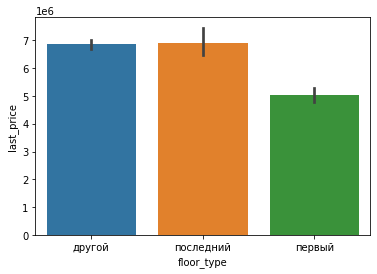

In [88]:
import seaborn as sns
sns.barplot(x='floor_type', y='last_price', data=clear_data)
plt.show()

Видно, что квартиры на первых этажах стоят дешевле остальных.

### Корреляция общей стоимости и даты размещения

<AxesSubplot:xlabel='publication_weekday', ylabel='last_price'>

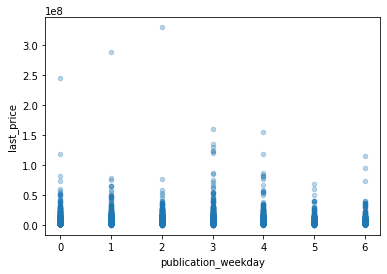

In [89]:
clear_data.plot(x='publication_weekday', y='last_price', kind='scatter', alpha=0.3)

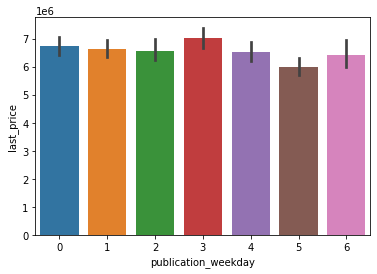

In [90]:
sns.barplot(x='publication_weekday', y='last_price', data=clear_data)
plt.show()

По графику можно сказать, что в четверг продавались квартиры по более высоким ценам, а в субботу - по самым низким.

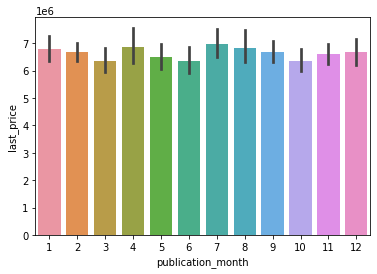

In [91]:
sns.barplot(x='publication_month', y='last_price', data=clear_data)
plt.show()

Цены продажи квартир размещенных в марте и октябре самые низкие, самые высокие в апреле и июле.

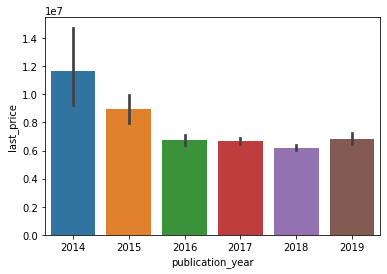

In [92]:
sns.barplot(x='publication_year', y='last_price', data=clear_data)
plt.show()

Из диаграммы видно, что с 2014 года цены на квартиры снижались, вплоть до 2018 года. В 2019 заметно увеличение количества проданных квартир, в сравнении с 2018, причиной могла стать общая экономическая обстановка в стране, подарожание стройматериалов и тд, что в общем может сказаться на рост цен в сфере недвижимости, как новой так и вторичной.

### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [94]:
median_price_per_meter = clear_data.groupby('locality_name')['price_per_meter'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
median_price_per_meter.reset_index(drop=True)
median_price_per_meter

,count,median
locality_name,,
Санкт-Петербург,9454,105478.060
Всеволожск,248,65811.400
Пушкин,220,100000.000
Шушары,204,77744.815
Мурино,203,85714.290
Колпино,193,74375.000
Кудрово,175,96540.970
Гатчина,138,68516.945
Петергоф,137,81944.440


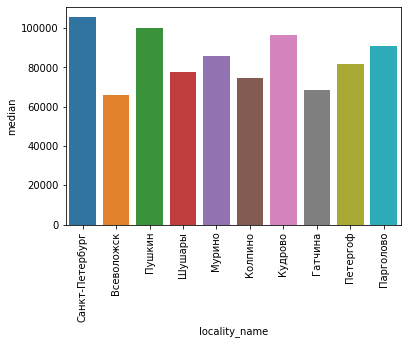

In [95]:
median_price_per_meter['locality_name'] = median_price_per_meter.index
sns.barplot(x='locality_name', y='median', data=median_price_per_meter)
plt.xticks(rotation=90)
None

Максимальная средняя цена за квадратный метр

In [96]:
median_price_per_meter[median_price_per_meter['median'] == median_price_per_meter['median'].max()]

,count,median,locality_name
locality_name,,,
Санкт-Петербург,9454,105478.06,Санкт-Петербург


 Минимальная средняя цена за квадратный метр

In [97]:
median_price_per_meter[median_price_per_meter['median'] == median_price_per_meter['median'].min()]

,count,median,locality_name
locality_name,,,
Всеволожск,248,65811.4,Всеволожск


Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений показал, что лидирует в нем Санкт_петербург, а замыкает Всеволожск.

### Средняя цена километра

In [98]:
spb_df = clear_data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='price_per_meter')
spb_df

,price_per_meter
cityCenters_nearest_km,
0.0,184680.071250
1.0,175729.731920
2.0,162426.276214
3.0,118286.023929
4.0,128911.973220
5.0,137190.206252
6.0,147054.989883
7.0,154239.250366
8.0,126482.861793


<AxesSubplot:xlabel='cityCenters_nearest_km'>

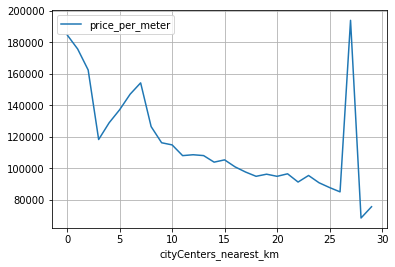

In [99]:
spb_df.plot(grid=True)

Исходя из общей динамики, можно заметить, что цена снижается в зависимости от удаленности от центра города. Однако, мы видим два скачка, примерно на 7 и 27км от центра, возможно, на расстоянии 7км находятся какие-то транспортные узлы и развязки, которые увеличивают стоимость из-за транспортной доступности. На 25км можно предположить, что имеется застройка элитными ЖК или вовсе частных домой в черте города, либо максимально приближенных к ней.

## Общий вывод

В рамках исследования объявлений о продаже квартир, мы опирались на данные сервиса недвижимости — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
На этапе предобработки данных мы столкнулись с рядом сложностей, пропуски в столбце balcony мы заполнили 0, исходя из-того, что пользователи просто пропускали данный столбец из-за отсутсвия балкона, так же мы поступили со столбцом is_apartment. Пропуски 'living_area' мы заполнили медианным значением, исходя из похожих по количеству комнат объектов. Пропуски в locality_name и floors_total составяляли малую долю от всех данных, поэтому мы их отбросили.

Даллее, избавились от дубликатов в столбце locality_name, заменив все буквы Ё на Е, и удалив типы населенных пунктов. После этого мы приступили к изучению аномальных значений с помощью boxplot. Определив явные выбросы и крайне редкие значения - мы их удалили. В результате преобразований, остались объекты соответствующие следующим критериям:
- квартиры, имеющие до 12 комнат;
- общей площадью до 400 квадратных метров;
- с потолками, высотой до 6 метров;
- жилой площадью до 200 квадратных метров;
- с площадью кухни не более 70 метров;
- с общим количеством этажей в доме не более 40;
- квартиры расположены до 25 этажа.

Далее мы произвели расчеты цены одного квадратного метра квартир, и составили топ 10 населенных пунктов с самой высокой ценой квадратного метра. Поработали с датой публикации, разделив ее на день недели, месяц и год. После, мы сгрупировали квартиры по типу этажа, на котором она ноходится, и расчитали расстояние до центра города в км.

Далее провели исследовательский анализ данных:

- Изучив параметры объектов недвижимости, мы смогли определить наиболее продаваемый объект недвижимости: это 1-2 комнатная квартира на 3-м этаже 5-этажного дома общей площадью 40-45 кв.м. с жилой площадью 15-20 кв.м. и площадью кухни около 8 кв.м., стоимостью 3,5-5 млн.руб. и высотой потолков 2,6 м., удаленная от центра на 12-16 км., от парка на 450 м и от аэропорта на 12-14 км. В конце года происходил резкий рост количества объявления о продаже.
- Проведя анализ скорости продажи квартир, обнаружили, что медиана время продажи квартиры составляет 195 дней. Медианное значение составляет 107 дней, что сильно отличается от среднего. Чаще всего объекты продавались на 45-й и 60-й день после подачи объявлений. При этом в наборе данных присутствуют необычно долгие продажи в течение 4-х лет и более. Также обнаружили, что быстрее всего продавались квартиры, размещенные в объявлениях в ноябре, а медленнее всего размещенные в июне.
- Изучив факторы, влияющие на стоимость объекта, выяснили что больше всего на стоимость влияет полная площадь объектов. При этом самая низкая цена у квартир на первом этаже, а выше всего цены на квартиры, находящиеся ни на первом, ни на последнем этаже. Также дороже всего продавались квартиры, размещенные в объявлениях по четвергам в апреле и декабре, а дешевле всего - в октябре. Кроме того выяснили, что Из диаграммы видно, что с 2014 года цены на квартиры падали, в 2018 году была самая низкая цена продаж, после чего цены вновь начали расти.
- Проанализировав цену одного квадратного метра, выяснили, что среди 10 населенных пунктов с наибольшим количеством объявлений максимальная стоимость квадратного метра наблюдается в Санкт-Петербурге, минимальная - во Всеволожске.
- Проанализировав стоимость объектов в зависимости от расстояния до центра в километрах убедились, что в целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 7 км и 27 км от центра наблюдается рост цен квадратного метра, это может быть связано с хорошей транспортной доступностью или элитных жилых районов.